<a href="https://colab.research.google.com/github/Imaneamaaz/codsoft_taskno5/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.8 MB/s eta 0:00:00


In [3]:
!pip install keras_facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=c5fb7e3f36ee6bae7b434b89eb1277c0ca26fc0e9924cda8ba4b72670c22db83
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from collections import Counter

In [5]:
# Define paths
DATA_DIR = "/content/drive/MyDrive/face_recognition/dataset"

In [6]:
# Function to load images from directory
def load_images_from_dir(dir_path, label):
    images = []
    labels = []
    for filename in os.listdir(dir_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(dir_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
            labels.append(label)
    return images, labels

In [7]:
# Function to load all images
def load_all_images(data_dir):
    actor_dirs = ["Brian_Acton", "bill_gates", "elon_musk","mark_zuckerberg"]
    images = []
    labels = []

    for actor in actor_dirs:
        dir_path = os.path.join(data_dir, actor)
        imgs, lbls = load_images_from_dir(dir_path, actor)
        images.extend(imgs)
        labels.extend(lbls)

    return np.array(images), np.array(labels)


In [8]:
# Initialize FaceNet
embedder = FaceNet()

# Function to get embeddings
def get_embedding(face_img, embedder):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]


In [10]:
import os
import cv2

def load_images_from_dir(dir_path, label):
    images = []
    labels = []
    for filename in os.listdir(dir_path):
        img_path = os.path.join(dir_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        images.append(img)
        labels.append(label)
    return images, labels

def load_all_images(data_dir):
    X, Y = [], []
    for label_dir in os.listdir(data_dir):
        dir_path = os.path.join(data_dir, label_dir)
        if not os.path.isdir(dir_path):
            continue
        images, labels = load_images_from_dir(dir_path, label_dir)
        X.extend(images)
        Y.extend(labels)
    return X, Y

# Load all images
DATA_DIR = '/content/drive/MyDrive/face_recognition/dataset'
X, Y = load_all_images(DATA_DIR)

# Calculate embeddings
EMBEDDED_X = [get_embedding(img, embedder) for img in X]
# Save embeddings and labels
np.save('EMBEDDED_X.npy', EMBEDDED_X)
np.save('Y.npy', Y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━

In [13]:
# Encode labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

# Assuming EMBEDDED_X is a list of embeddings
EMBEDDED_X = np.array(EMBEDDED_X)

# Flatten data
EMBEDDED_X_flat = EMBEDDED_X.reshape(EMBEDDED_X.shape[0], -1)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(EMBEDDED_X_flat, Y_encoded, test_size=0.2, random_state=42)


In [14]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Définition de l'espace de recherche
space = {
    'C': hp.loguniform('C', np.log(0.001), np.log(1000)),
    'gamma': hp.loguniform('gamma', np.log(0.0001), np.log(1)),
}

# Fonction objectif
def objective(params):
    svc = SVC(kernel='rbf', probability=True, **params)
    accuracy = cross_val_score(svc, X_train, y_train, cv=3, scoring='accuracy').mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Optimisation
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best parameters found: ", best_params)


100%|██████████| 100/100 [00:05<00:00, 17.83trial/s, best loss: -0.7402597402597403]
Best parameters found:  {'C': 141.68827562388353, 'gamma': 0.8969880408685312}


Distribution des classes dans l'ensemble d'entraînement: Counter({1: 21, 2: 17, 3: 17, 0: 10})
Distribution des classes dans l'ensemble de validation: Counter({3: 3, 1: 2, 2: 2})
Distribution des classes dans l'ensemble de test: Counter({2: 4, 3: 3, 1: 2})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.7230769230769231
Validation Accuracy: 0.5714285714285714
Test Accuracy: 1.0
Train Precision: 0.6482051282051282
Validation Precision: 0.6428571428571429
Test Precision: 1.0
Train Recall: 0.7230769230769231
Validation Recall: 0.5714285714285714
Test Recall: 1.0
Train F1 Score: 0.6690291804718373
Validation F1 Score: 0.5782312925170068
Test F1 Score: 1.0


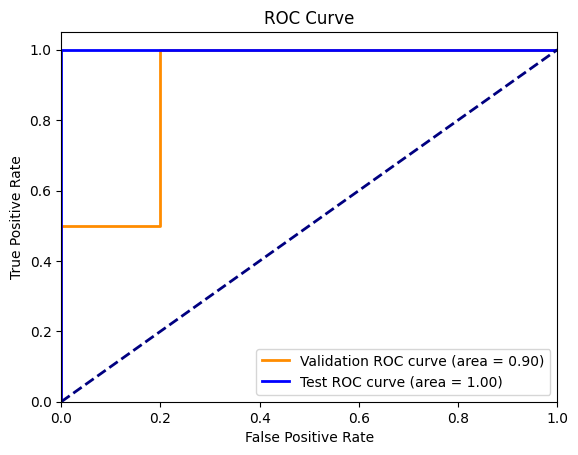

Distribution des classes dans l'ensemble d'entraînement: Counter({2: 19, 3: 19, 1: 19, 0: 8})
Distribution des classes dans l'ensemble de validation: Counter({3: 2, 1: 2, 2: 2, 0: 1})
Distribution des classes dans l'ensemble de test: Counter({1: 4, 0: 2, 3: 2, 2: 2})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.7384615384615385
Validation Accuracy: 0.5714285714285714
Test Accuracy: 0.7
Train Precision: 0.7224175824175824
Validation Precision: 0.6857142857142857
Test Precision: 0.62
Train Recall: 0.7384615384615385
Validation Recall: 0.5714285714285714
Test Recall: 0.7
Train F1 Score: 0.7032537832537831
Validation F1 Score: 0.5442176870748299
Test F1 Score: 0.6222222222222222


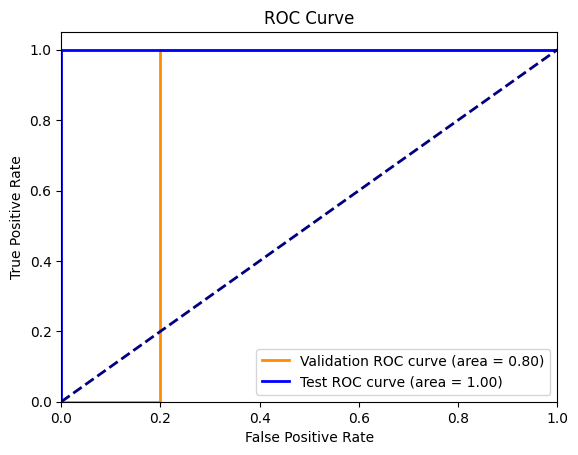

Distribution des classes dans l'ensemble d'entraînement: Counter({1: 20, 3: 19, 2: 17, 0: 10})
Distribution des classes dans l'ensemble de validation: Counter({2: 2, 1: 2, 3: 2})
Distribution des classes dans l'ensemble de test: Counter({2: 4, 1: 3, 3: 2})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.6666666666666666
Validation Accuracy: 0.8333333333333334
Test Accuracy: 0.6666666666666666
Train Precision: 0.6795231729055259
Validation Precision: 0.8888888888888888
Test Precision: 0.8666666666666667
Train Recall: 0.6666666666666666
Validation Recall: 0.8333333333333334
Test Recall: 0.6666666666666666
Train F1 Score: 0.6258153970018376
Validation F1 Score: 0.8222222222222223
Test F1 Score: 0.68994708994709


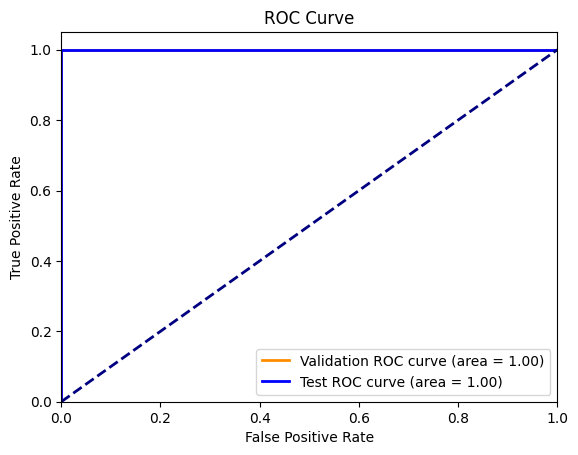

Distribution des classes dans l'ensemble d'entraînement: Counter({2: 21, 1: 20, 3: 17, 0: 8})
Distribution des classes dans l'ensemble de validation: Counter({3: 3, 1: 2, 0: 1, 2: 1})
Distribution des classes dans l'ensemble de test: Counter({1: 3, 3: 3, 0: 2, 2: 1})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.7424242424242424
Validation Accuracy: 0.7142857142857143
Test Accuracy: 0.5555555555555556
Train Precision: 0.6592654657170787
Validation Precision: 0.761904761904762
Test Precision: 0.5277777777777778
Train Recall: 0.7424242424242424
Validation Recall: 0.7142857142857143
Test Recall: 0.5555555555555556
Train F1 Score: 0.6892463031330065
Validation F1 Score: 0.7000000000000001
Test F1 Score: 0.5111111111111111


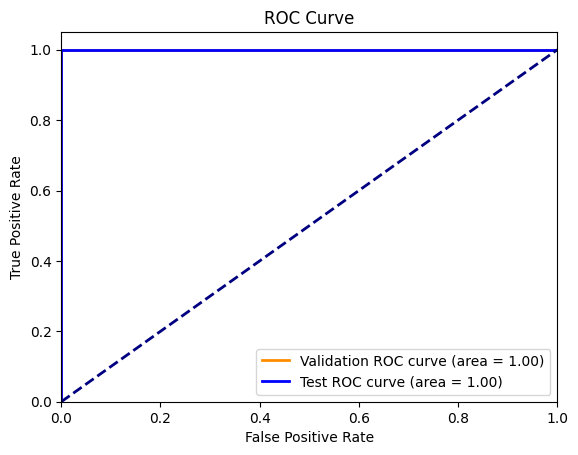

Distribution des classes dans l'ensemble d'entraînement: Counter({3: 20, 1: 20, 2: 18, 0: 8})
Distribution des classes dans l'ensemble de validation: Counter({3: 2, 1: 2, 2: 2, 0: 1})
Distribution des classes dans l'ensemble de test: Counter({1: 3, 2: 3, 0: 2, 3: 1})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.7272727272727273
Validation Accuracy: 0.7142857142857143
Test Accuracy: 0.4444444444444444
Train Precision: 0.7352472089314195
Validation Precision: 0.7142857142857143
Test Precision: 0.6851851851851852
Train Recall: 0.7272727272727273
Validation Recall: 0.7142857142857143
Test Recall: 0.4444444444444444
Train F1 Score: 0.6965285034250552
Validation F1 Score: 0.6666666666666666
Test F1 Score: 0.4650793650793651


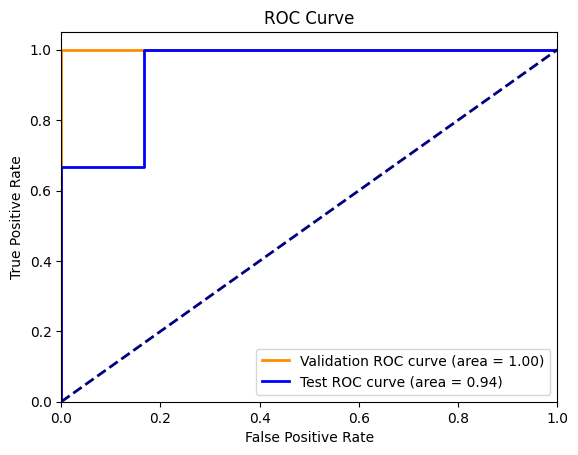

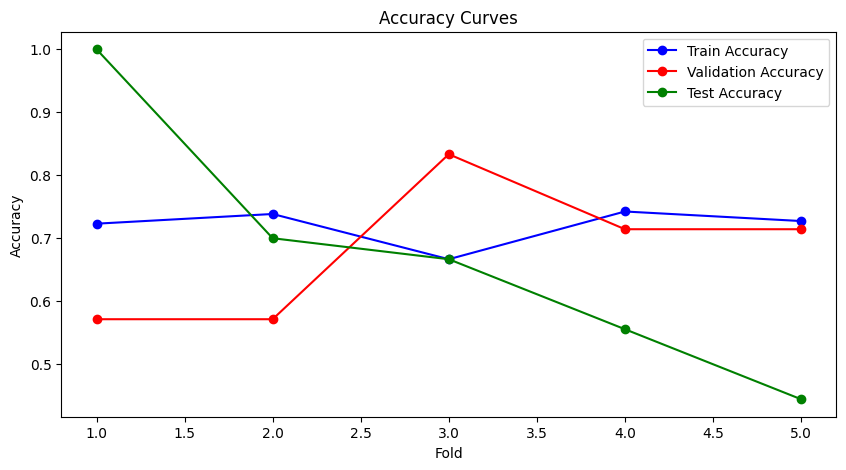

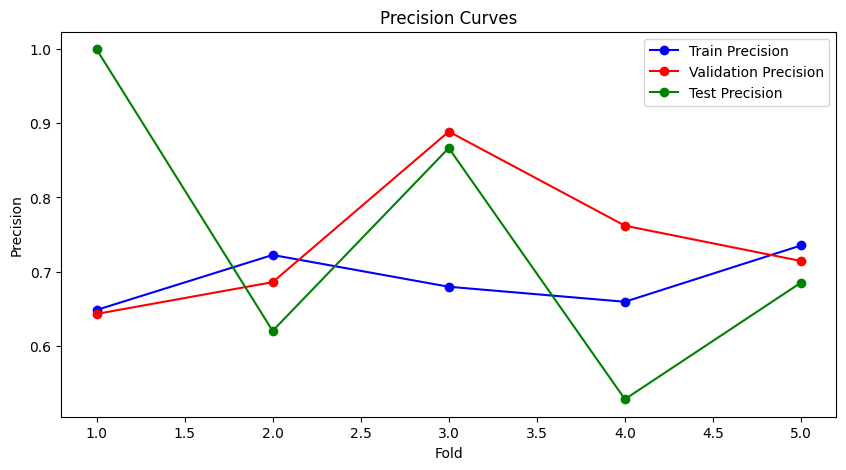

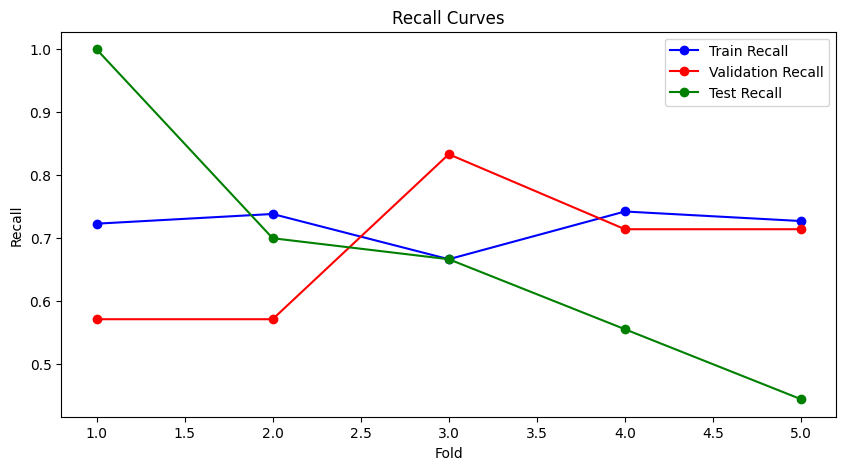

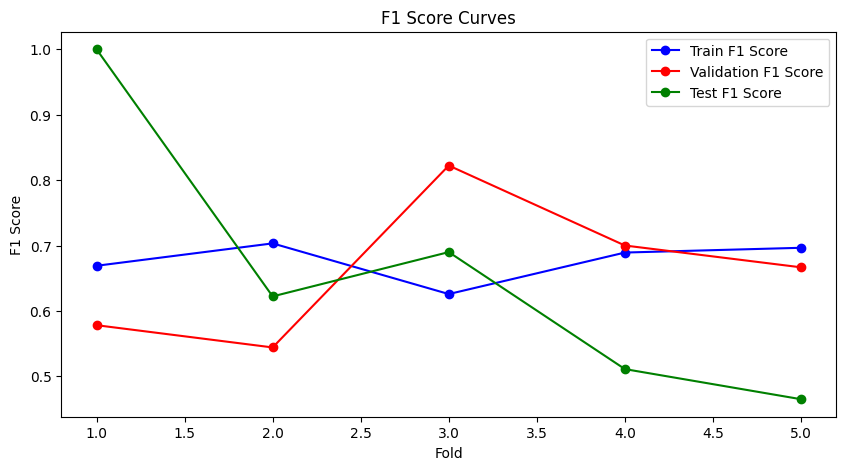

In [17]:
from sklearn.model_selection import KFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Assuming EMBEDDED_X_flat and Y_encoded are already defined
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []
test_accuracies = []
train_precisions = []
val_precisions = []
test_precisions = []
train_recalls = []
val_recalls = []
test_recalls = []
train_f1s = []
val_f1s = []
test_f1s = []

# Loop through folds
for train_index, val_test_index in kf.split(EMBEDDED_X_flat, Y_encoded):
    X_train, X_temp = EMBEDDED_X_flat[train_index], EMBEDDED_X_flat[val_test_index]
    y_train, y_temp = Y_encoded[train_index], Y_encoded[val_test_index]

    # Check distribution and remove classes with less than 2 samples in y_temp
    class_counts = Counter(y_temp)
    single_sample_classes = [cls for cls, count in class_counts.items() if count < 2]
    if single_sample_classes:
        mask = np.isin(y_temp, single_sample_classes, invert=True)
        y_temp = y_temp[mask]
        X_temp = X_temp[mask]

    # Further split temp set into validation and test sets with increased size
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.55, random_state=75)
    for val_index, test_index in sss.split(X_temp, y_temp):
        X_val, X_test = X_temp[val_index], X_temp[test_index]
        y_val, y_test = y_temp[val_index], y_temp[test_index]

    # Check distribution
    check_distribution(y_train, 'l\'ensemble d\'entraînement')
    check_distribution(y_val, 'l\'ensemble de validation')
    check_distribution(y_test, 'l\'ensemble de test')

    # Train model
    grid_search.fit(X_train, y_train)

    # Evaluate performance
    ypreds_train = grid_search.best_estimator_.predict(X_train)
    ypreds_val = grid_search.best_estimator_.predict(X_val)
    ypreds_test = grid_search.best_estimator_.predict(X_test)

    train_accuracy = accuracy_score(y_train, ypreds_train)
    val_accuracy = accuracy_score(y_val, ypreds_val)
    test_accuracy = accuracy_score(y_test, ypreds_test)

    train_precision = precision_score(y_train, ypreds_train, average='weighted')
    val_precision = precision_score(y_val, ypreds_val, average='weighted')
    test_precision = precision_score(y_test, ypreds_test, average='weighted')

    train_recall = recall_score(y_train, ypreds_train, average='weighted')
    val_recall = recall_score(y_val, ypreds_val, average='weighted')
    test_recall = recall_score(y_test, ypreds_test, average='weighted')

    train_f1 = f1_score(y_train, ypreds_train, average='weighted')
    val_f1 = f1_score(y_val, ypreds_val, average='weighted')
    test_f1 = f1_score(y_test, ypreds_test, average='weighted')

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

    train_precisions.append(train_precision)
    val_precisions.append(val_precision)
    test_precisions.append(test_precision)

    train_recalls.append(train_recall)
    val_recalls.append(val_recall)
    test_recalls.append(test_recall)

    train_f1s.append(train_f1)
    val_f1s.append(val_f1)
    test_f1s.append(test_f1)

    print("Train Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Test Accuracy:", test_accuracy)

    print("Train Precision:", train_precision)
    print("Validation Precision:", val_precision)
    print("Test Precision:", test_precision)

    print("Train Recall:", train_recall)
    print("Validation Recall:", val_recall)
    print("Test Recall:", test_recall)

    print("Train F1 Score:", train_f1)
    print("Validation F1 Score:", val_f1)
    print("Test F1 Score:", test_f1)

    # Plot ROC curve for validation and test sets
    fpr_val, tpr_val, _ = roc_curve(y_val, grid_search.best_estimator_.predict_proba(X_val)[:, 1], pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fpr_test, tpr_test, _ = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1], pos_label=1)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure()
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot accuracy curves
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, 'ro-', label='Validation Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, 'go-', label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plot precision curves
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(train_precisions) + 1), train_precisions, 'bo-', label='Train Precision')
plt.plot(range(1, len(val_precisions) + 1), val_precisions, 'ro-', label='Validation Precision')
plt.plot(range(1, len(test_precisions) + 1), test_precisions, 'go-', label='Test Precision')
plt.title('Precision Curves')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.legend()

plt.show()

# Plot recall curves
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(train_recalls) + 1), train_recalls, 'bo-', label='Train Recall')
plt.plot(range(1, len(val_recalls) + 1), val_recalls, 'ro-', label='Validation Recall')
plt.plot(range(1, len(test_recalls) + 1), test_recalls, 'go-', label='Test Recall')
plt.title('Recall Curves')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.legend()

plt.show()

# Plot F1 score curves
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(train_f1s) + 1), train_f1s, 'bo-', label='Train F1 Score')
plt.plot(range(1, len(val_f1s) + 1), val_f1s, 'ro-', label='Validation F1 Score')
plt.plot(range(1, len(test_f1s) + 1), test_f1s, 'go-', label='Test F1 Score')
plt.title('F1 Score Curves')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

plt.show()

In [18]:
!pip install tensorflow


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
# Importer les bibliothèques nécessaires
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
HAARCASCADE_PATH = "/content/drive/MyDrive/face_recognition/haarcascade_frontalface_default.xml"
SIMILARITY_THRESHOLD = 0.6

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


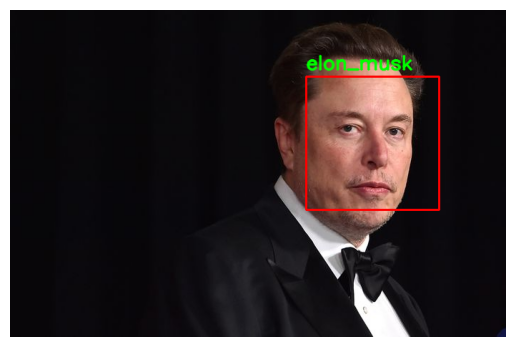

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


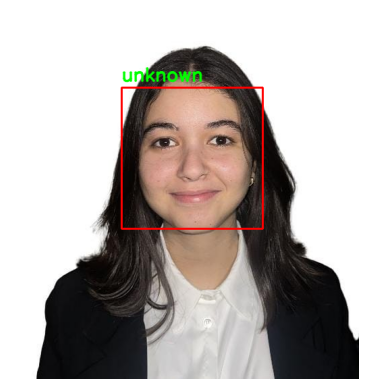

In [23]:
# Initialize FaceNet and Haarcascade
facenet = FaceNet()
haarcascade = cv2.CascadeClassifier(HAARCASCADE_PATH)

# Load the known embeddings and labels (assumes they are saved previously)
EMBEDDED_X = np.load('EMBEDDED_X.npy')
Y = np.load('Y.npy')

# Function to get embeddings
def get_embedding(face_img, embedder):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

# Function to recognize faces in an image
def recognize_faces(image_path):
    image = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)

    for (x, y, w, h) in faces:
        face = rgb_img[y:y + h, x:x + w]
        face = cv2.resize(face, (160, 160))
        embedding = get_embedding(face, facenet)

        # Calculate similarity with known embeddings
        similarities = cosine_similarity([embedding], EMBEDDED_X)
        max_similarity = np.max(similarities)

        # Determine the label based on similarity
        if max_similarity < SIMILARITY_THRESHOLD:
            final_name = 'unknown'
        else:
            best_match_index = np.argmax(similarities)
            final_name = Y[best_match_index]

        # Draw rectangle and label on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, str(final_name), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test the function
image_path1 = "/content/drive/MyDrive/face_recognition/IMG-20240227-WA0014.jpg"
image_path2 = "/content/drive/MyDrive/face_recognition/téléchargement.jpeg"
recognize_faces(image_path2)
recognize_faces(image_path1)
